In [88]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [89]:
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

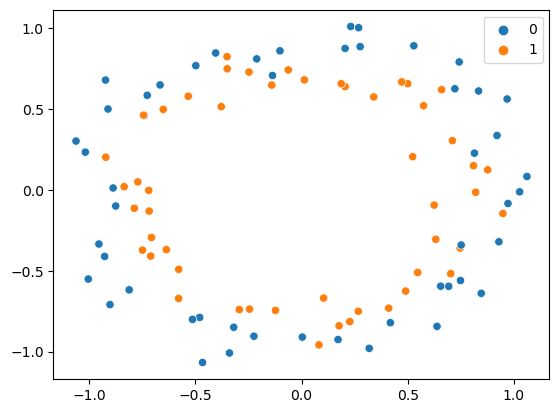

In [90]:
sns.scatterplot(data=x, x=x[:,0],y=x[:,1], hue=y)
# sns.scatterplot(X[:,0],X[:,1],hue=y) ==> Deprecated

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=2)

In [92]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [93]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [94]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, verbose=0)

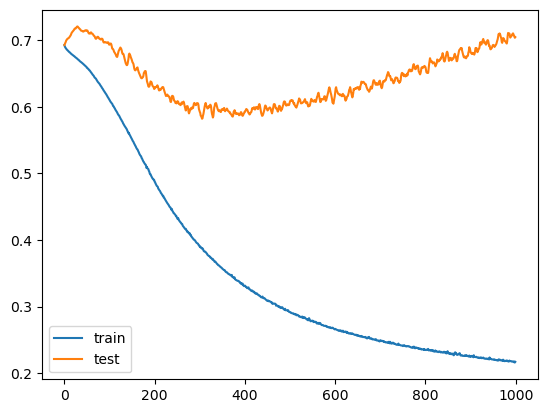

In [95]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

9600/9600 [==============================] - 9s 900us/step


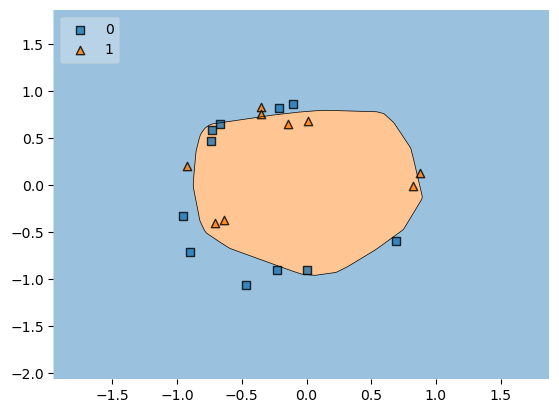

In [96]:
plot_decision_regions(x_test, y_test.ravel(),clf=model, legend=2)
plt.show()

# Early Stopping

In [98]:
model = Sequential()
model.add(Dense(256, input_dim=2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [99]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [100]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [101]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 81ms/step - loss: 0.6971 - accuracy: 0.4500 - val_loss: 0.6927 - val_accuracy: 0.4500
Epoch 2/3500
3/3 [==============================] - 0s 13ms/step - loss: 0.6944 - accuracy: 0.5250 - val_loss: 0.6959 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6919 - accuracy: 0.5625 - val_loss: 0.6985 - val_accuracy: 0.4500
Epoch 4/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6908 - accuracy: 0.5375 - val_loss: 0.7016 - val_accuracy: 0.4500
Epoch 5/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6895 - accuracy: 0.5500 - val_loss: 0.7035 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6888 - accuracy: 0.5375 - val_loss: 0.7054 - val_accuracy: 0.4500
Epoch 7/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6879 - accuracy: 0.5500 - val_loss: 0.7071 - val_accuracy: 0.4000
Epoch 8/3500


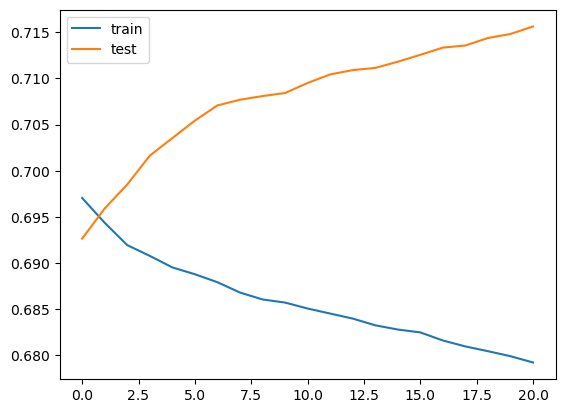

In [102]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

9600/9600 [==============================] - 10s 1ms/step


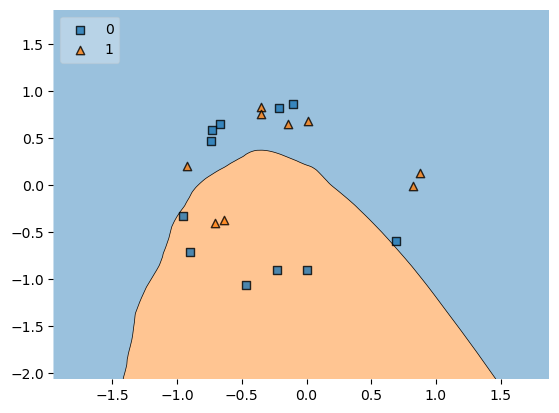

In [103]:
plot_decision_regions(x_test,y_test.ravel(), clf=model, legend=2)
plt.show()